# PA 3: Association Analysis - Apriori Algorithm

## Student Details

Student Name and ID:

Shivani Manojkumar Panchiwala - 1001982478

Kuldip Rameshbhai Savaliya - 1001832000

Meghaben Ghanshyambhai Patel - 1002006777


## Submission Instructions


Step 1: Rename this file to 'yourNetID_PA3.ipnyb' and the report file to 'yourNetID_PA3.pdf' <br>

Step 2: Upload all the document separately onto canvas  <br>**Not in a zip file. 20 points will be deducted if you don't follow the instruction**  <br>
Note: Your submission should include ONLY the following files: <br>
    * apriory.py  <br>
    * yourNetID_PA3.ipynb  <br> 
    * yourNetID_PA3.pdf  <br> 
    * dataset.csv  <br>
    * toyDS.csv <br>

## Programming Assignment Details

Before you start:
- Note that this is an individual assignment.
- Be familiar with the algorithm and with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Random Shopping cart' dataset [01],
* and the Apriori Algorithm (apriory.py)[02]. Note that the apriory.py file is modified to run with Python 3.

## ** Do Not Delete the Above Cell** <br>
10 points will be deducted if the instructions are not followed


## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd

In [3]:
import pandas as pd
from pandas import DataFrame
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import apriori
from apriori import getItemSetTransactionList
from apriori import returnItemsWithMinSupport
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from apriori import runApriori
from apriori import printResults
from apriori import dataFromFile
from apriori import joinSet
from apriori import subsets
from IPython.display import Image

### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'dataset_group.csv' to look like the toyDS.csv.  Each transaction is at one line with a variable length.  Discard the date attribute (1st attribute) from your dataset.  For example, in your dataset transaction#4 should look like: 
    
    cereals,juice,lunch meat,soda,toilet paper,all-purpose

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


ScreenShot of the toyDS.csv


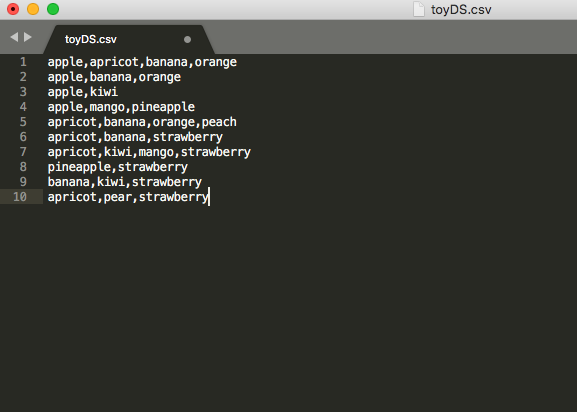

In [4]:
from IPython.display import Image
print ('ScreenShot of the toyDS.csv')
Image("SampleScreen01.png")

In [5]:
# # # # # # # # #  Code for Task 1 # # # # # # # # #

In [6]:
df= pd.read_csv('dataset_group.csv')
df.head(2)

,2000-01-01,1,yogurt
0,2000-01-01,1,pork
1,2000-01-01,1,sandwich bags


In [7]:
# Giving the columns name
df.columns =['Date', 'Index', 'Items']

In [8]:
df

,Date,Index,Items
0,2000-01-01,1,pork
1,2000-01-01,1,sandwich bags
2,2000-01-01,1,lunch meat
3,2000-01-01,1,all- purpose
4,2000-01-01,1,flour
...,...,...,...
22337,2002-02-26,1139,soda
22338,2002-02-26,1139,laundry detergent
22339,2002-02-26,1139,vegetables
22340,2002-02-26,1139,shampoo


In [9]:
df = df[['Index', 'Items']].copy()
df.head(2)

,Index,Items
0,1,pork
1,1,sandwich bags


In [10]:
# Joining the data from different rows by groupby function
df = df.groupby('Index', as_index=False).agg({'Items' : ', '.join})

In [11]:
# deleting Index column
del df['Index']
df.head(5)

,Items
0,"pork, sandwich bags, lunch meat, all- purpose,..."
1,"toilet paper, shampoo, hand soap, waffles, veg..."
2,"soda, pork, soap, ice cream, toilet paper, din..."
3,"cereals, juice, lunch meat, soda, toilet paper..."
4,"sandwich loaves, pasta, tortillas, mixes, hand..."


In [12]:
#Creating Dataframe with records as items
df = df['Items'].str.split(',', expand=True)


In [13]:
#Creating List of all the data named dataset

dataset = []
for i in range (0, df.shape[0]):
    data=[]
    for j in df.values[i]:
        if j!= None:
            data.append(j)
    dataset.append(data)

In [14]:
import csv
#write the list the to csv file named dataset

with open('dataset.csv', 'w', newline='') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    # csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(dataset)

In [15]:
#Read the data

final_df = pd.read_csv('dataset.csv', names = range(0, df.shape[1]))
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,pork,sandwich bags,lunch meat,all- purpose,flour,soda,butter,vegetables,beef,aluminum foil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,toilet paper,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,...,spaghetti sauce,pork,vegetables,cheeses,eggs,vegetables,vegetables,NaN,NaN,NaN
3,cereals,juice,lunch meat,soda,toilet paper,all- purpose,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sandwich loaves,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,...,all- purpose,soda,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# shape of final_df
final_df.shape

(1139, 34)

ScreenShot_group_dataset.csv


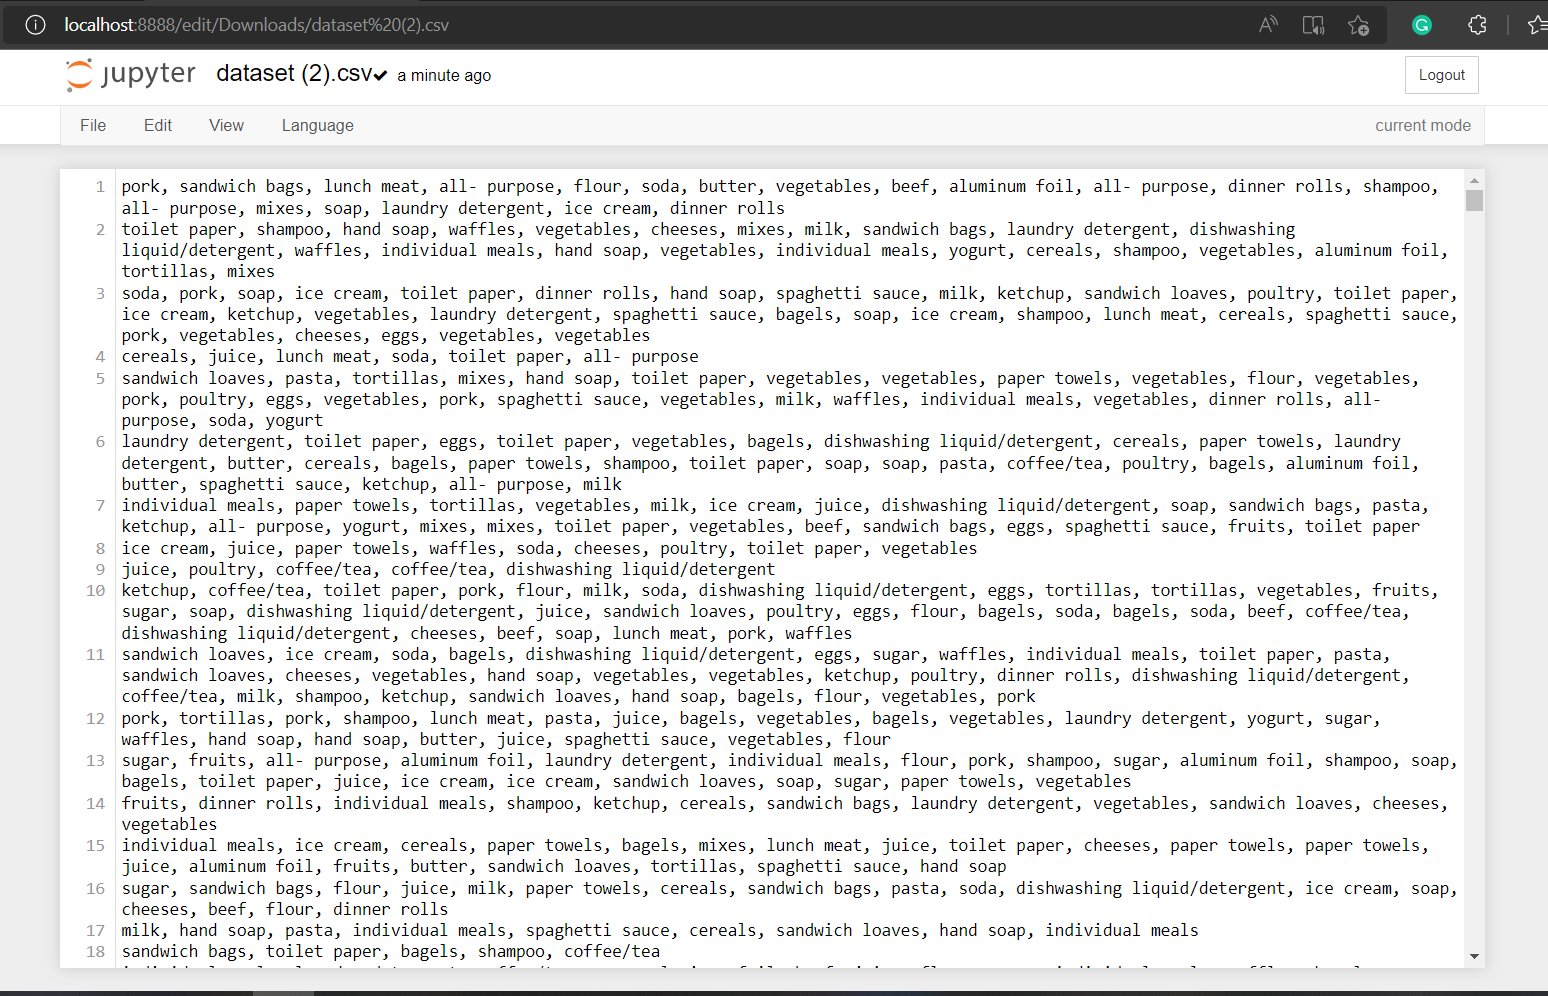

In [17]:
# # #  Solution  # # #

from IPython.display import Image, display
print ('ScreenShot_group_dataset.csv')
Image('Screenshot_group_dataset_ass_3.PNG')

### Task 2: Run apriory.py and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!". 

(*) For those that are not familiar with python and coding this could be a quite demanding task.


You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments. 


In [18]:
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 
from pandas import DataFrame
#Storing datagenerator object in infile and generating items, rules by calling runApriori function
inFile = dataFromFile('dataset.csv')
items, rules = runApriori(inFile, 0.3, 0.3)
minimum_support_= 0.3
minimum_confidence_= 0.3
print (f'Case 1 (minimum support={minimum_support_} and minimum confidence={minimum_confidence_})')
print ('Case 1 Reasoning:\n Here the item set with support greater than 0.05 are considered in the ITEMS, as you can see the support values seperated by commas are greater than the given minimum support.\nAs in (Coffee, Cake) case the support is 0.055 i.e out of all the transactions occured(9465) customer have bought coffee and cake together for 9645*0.055= 520 times.\nFor every Non-empty subset(S : (coffee)) of an Item set(I : (coffee, cake)) the association rule is\n S->I-S i.e coffee-> (coffee, cake)-(coffee)\n Support(I)/Support(S)= (0.055/0.478)= 0.115 which is greater than the minimum confidence provided 0.04\n Therefore (Coffee) ==> (Cake) is defined as a rule. Similarly, the other rules are generated.')
print ('Case 1 Output:\n')
printResults(items, rules)

# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=0.3 and minimum confidence=0.3)
Case 1 Reasoning:
 Here the item set with support greater than 0.05 are considered in the ITEMS, as you can see the support values seperated by commas are greater than the given minimum support.
As in (Coffee, Cake) case the support is 0.055 i.e out of all the transactions occured(9465) customer have bought coffee and cake together for 9645*0.055= 520 times.
For every Non-empty subset(S : (coffee)) of an Item set(I : (coffee, cake)) the association rule is
 S->I-S i.e coffee-> (coffee, cake)-(coffee)
 Support(I)/Support(S)= (0.055/0.478)= 0.115 which is greater than the minimum confidence provided 0.04
 Therefore (Coffee) ==> (Cake) is defined as a rule. Similarly, the other rules are generated.
Case 1 Output:


------------ITEMS-----------------
item: (' yogurt', ' vegetables') , 0.300
item: (' eggs', ' vegetables') , 0.307
item: (' vegetables', ' poultry') , 0.314
item

In [19]:
print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #') 
inFile = dataFromFile('dataset.csv')
items, rules = runApriori(inFile, 0.2, 0.2)
minimum_support_= 0.2
minimum_confidence_= 0.2
print (f'Case 2 (minimum support={minimum_support_} and minimum confidence={minimum_confidence_})')
print ('Case 2 Reasoning:\n Here the item set with support greater than 0.05 are considered in the ITEMS, as you can see the support values seperated by commas are greater than the given minimum support.\n As in (Bread, Coffee) case the support is 0.090 i.e out of all the transactions occured(9465) customer have bought bread and coffee together for 9645*0.090= 852 times.\nFor every Non-empty subset(S : (Bread)) of an Item set(I : (Bread, Coffee)) the association rule is\n S->I-S i.e Bread-> (Bread, Coffee)-(Bread)\n Support(I)/Support(S)= (0.090/0.327)= 0.275 which is greater than the minimum confidence provided 0.04\n Therefore (Bread) ==> (Coffee) is not defined as a rule. Similarly, the other rules are not generated except (Cake) ==> (Coffee) as the its confidence (0.055/0.104)= 0.528 is higher than the minimum confidence 0.4')
print ('Case 2 Output:\n')
printResults(items, rules)

# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #
Case 2 (minimum support=0.2 and minimum confidence=0.2)
Case 2 Reasoning:
 Here the item set with support greater than 0.05 are considered in the ITEMS, as you can see the support values seperated by commas are greater than the given minimum support.
 As in (Bread, Coffee) case the support is 0.090 i.e out of all the transactions occured(9465) customer have bought bread and coffee together for 9645*0.090= 852 times.
For every Non-empty subset(S : (Bread)) of an Item set(I : (Bread, Coffee)) the association rule is
 S->I-S i.e Bread-> (Bread, Coffee)-(Bread)
 Support(I)/Support(S)= (0.090/0.327)= 0.275 which is greater than the minimum confidence provided 0.04
 Therefore (Bread) ==> (Coffee) is not defined as a rule. Similarly, the other rules are not generated except (Cake) ==> (Coffee) as the its confidence (0.055/0.104)= 0.528 is higher than the minimum confidence 0.4
Case 2 Output:


------------ITEMS-----------------
item

In [20]:
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #') 
inFile = dataFromFile('dataset.csv')
items, rules = runApriori(inFile, 0.15, 0.6)
minimum_support_= 0.15
minimum_confidence_= 0.6
print (f'Case 3 (minimum support={minimum_support_} and minimum confidence={minimum_confidence_})')
print ('Case 3 Reasoning:\n Here the item set with support greater than 0.04 are considered in the ITEMS, as you can see the support values seperated by commas are greater than the given minimum support.\n As in (pastry, Coffee) case the support is 0.048 i.e out of all the transactions occured(9465) customer have bought pastry and coffee together for 9645*0.048= 463 times.\nFor every Non-empty subset(S : (Pastry)) of an Item set(I : (Pastry, Coffee)) the association rule is\n S->I-S i.e Pastry-> (Pastry, Coffee)-(Pastry)\n Support(I)/Support(S)= (0.048/0.086)= 0.55 which is greater than the minimum confidence provided 0.1\n Therefore (Bread) ==> (Coffee) is not defined as a rule. Similarly, the other rules are not generated except (Cake) ==> (Coffee) as the its confidence (0.055/0.104)= 0.528 is higher than the minimum confidence 0.1')
print ('Case 3 Output:\n')
printResults(items, rules)

# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #
Case 3 (minimum support=0.15 and minimum confidence=0.6)
Case 3 Reasoning:
 Here the item set with support greater than 0.04 are considered in the ITEMS, as you can see the support values seperated by commas are greater than the given minimum support.
 As in (pastry, Coffee) case the support is 0.048 i.e out of all the transactions occured(9465) customer have bought pastry and coffee together for 9645*0.048= 463 times.
For every Non-empty subset(S : (Pastry)) of an Item set(I : (Pastry, Coffee)) the association rule is
 S->I-S i.e Pastry-> (Pastry, Coffee)-(Pastry)
 Support(I)/Support(S)= (0.048/0.086)= 0.55 which is greater than the minimum confidence provided 0.1
 Therefore (Bread) ==> (Coffee) is not defined as a rule. Similarly, the other rules are not generated except (Cake) ==> (Coffee) as the its confidence (0.055/0.104)= 0.528 is higher than the minimum confidence 0.1
Case 3 Output:


------------ITEMS----------------

## Report 
(separately in pdf)

Take a small dataset (it can be any dataset). Show 3 support and confidence for the small dataset. Show the rules for all the 3 cases using the formula.
Provide references where ever necessary.

# References

[01] https://www.kaggle.com/acostasg/random-shopping-cart

[02] https://github.com/asaini/Apriori


# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [30 points] - DataSet Preprocess 
* [30 points] - Run apriory.py
* [5 points] - Evaluate Results 
* [25 points] - Report 
